# **Install the libraries**

In [2]:
!python.exe -m pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy

# **Load the library**

In [3]:
import pandas as pd
import numpy as np

# **Load and Clean the data**

In [11]:
airBnbData = pd.read_csv('Listings.csv')

In [12]:
#remove the NaN sign from the neighbourhood_group column
airBnbData = airBnbData.replace(np.nan, '0', regex=True)
#get the list of the name to give it a unique number
RoomType = airBnbData['room_type'].unique()
neighbourhood = airBnbData['neighbourhood'].unique()

# replace the name with the unique number
for (i,type)  in enumerate(RoomType):
    airBnbData = airBnbData.replace(type, i)

for (i,type)  in enumerate(neighbourhood):
    airBnbData = airBnbData.replace(type, i)

#remove the columns that we don't need
airBnbData.pop("neighbourhood_group")
airBnbData.pop("id")
airBnbData.pop("host_name")
airBnbData.pop("host_id")
airBnbData.pop("last_review")
airBnbData.pop("license")
airBnbData.pop("name")
airBnbData.head()



,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,52.36435,4.94358,0,69,3,336,1.95,1,7,40
1,1,52.36407,4.89393,0,106,1,339,2.1,2,0,0
2,2,52.35150,4.89656,1,270,4,23,0.16,1,2,1
3,3,52.36420,4.92829,1,200,3,21,0.15,1,0,0
4,4,52.38761,4.89188,0,137,3,251,1.81,1,0,20


In [13]:
summary_ROOM=airBnbData.groupby(['room_type']).agg({"price":np.mean,"minimum_nights":np.mean,"number_of_reviews":np.mean,"availability_365":np.mean}).sort_values(by=['price'],ascending=True)
summary_neghbourhood=airBnbData.groupby(['neighbourhood']).agg({"price":np.mean,"minimum_nights":np.mean,"number_of_reviews":np.mean,"availability_365":np.mean}).sort_values(by=['price'],ascending=True)
summary_ROOM.head()

,price,minimum_nights,number_of_reviews,availability_365
room_type,,,,
3,161.674419,1.465116,115.069767,132.953488
0,182.154693,3.411356,126.161066,128.552144
2,240.142857,1.357143,147.589286,149.017857
1,272.403251,5.423310,22.550061,63.903164


# **Plot the histogram for the group**

<Axes: xlabel='neighbourhood'>

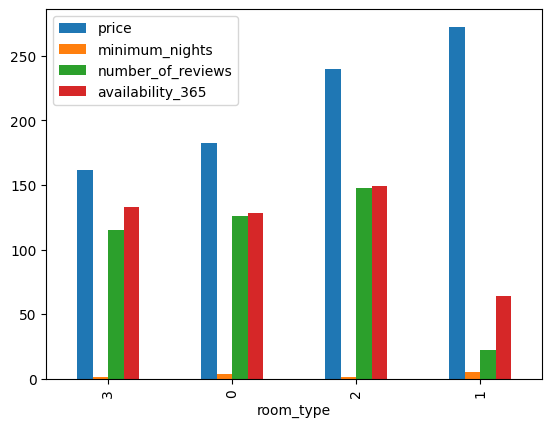

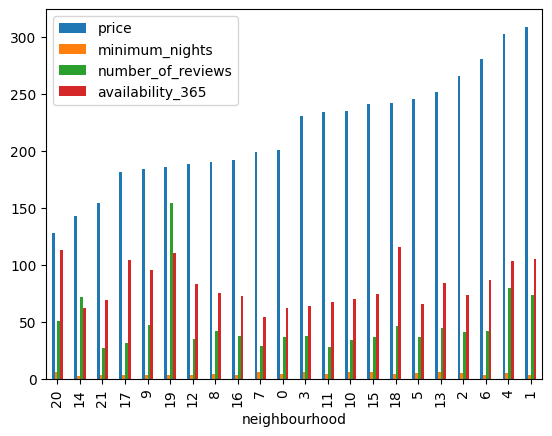

In [14]:
summary_ROOM.plot.bar()
summary_neghbourhood.plot.bar()

# **Plot the correlations between features of the neighbourhood type**

<Axes: >

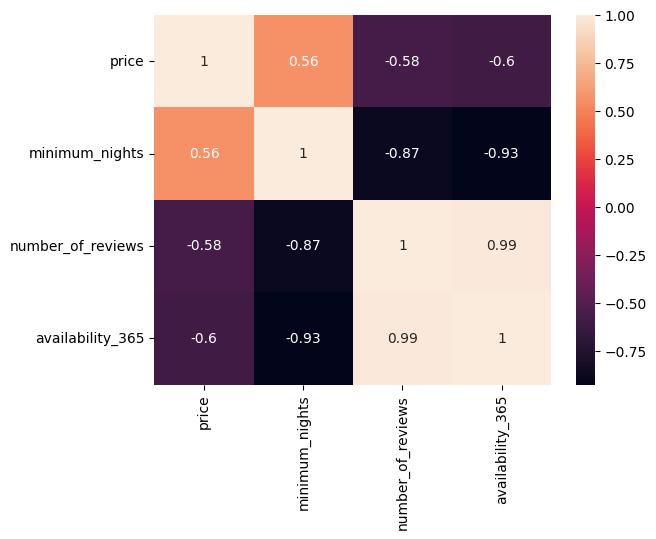

In [15]:
import seaborn as sns
sns.heatmap(summary_ROOM.corr(), annot=True)

,price,minimum_nights,availability_365
room_type,,,
3,161.674419,1.465116,132.953488
0,182.154693,3.411356,128.552144
2,240.142857,1.357143,149.017857
1,272.403251,5.423310,63.903164


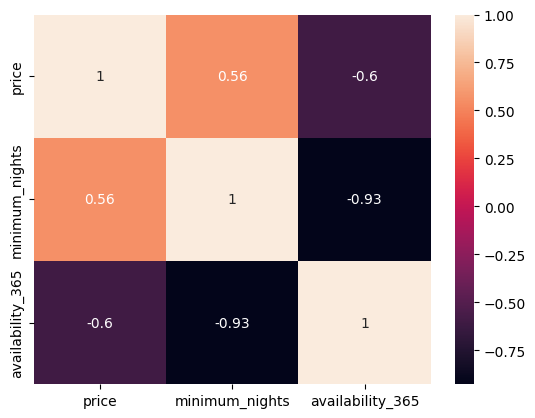

In [18]:
# we notice a high correlation between the number of reviews and the availability of the room
summary_ROOM.pop("number_of_reviews")
sns.heatmap(summary_ROOM.corr(), annot=True)
summary_ROOM.head()

# **Plot the correlations between features of the neighbourhood type**

<Axes: >

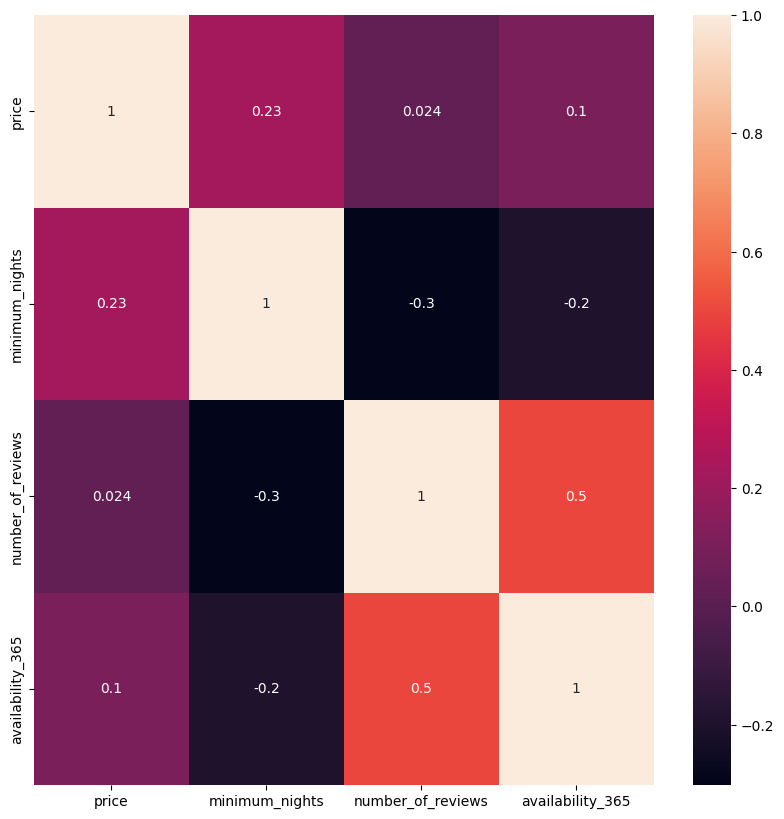

In [44]:
sns.heatmap(summary_neghbourhood.corr(), annot=True)

# **Plot the relations between Room type and pice**

the most popular room type is Entire home/apt while the most popular neghbourhood is De Baarsjes - Oud-West


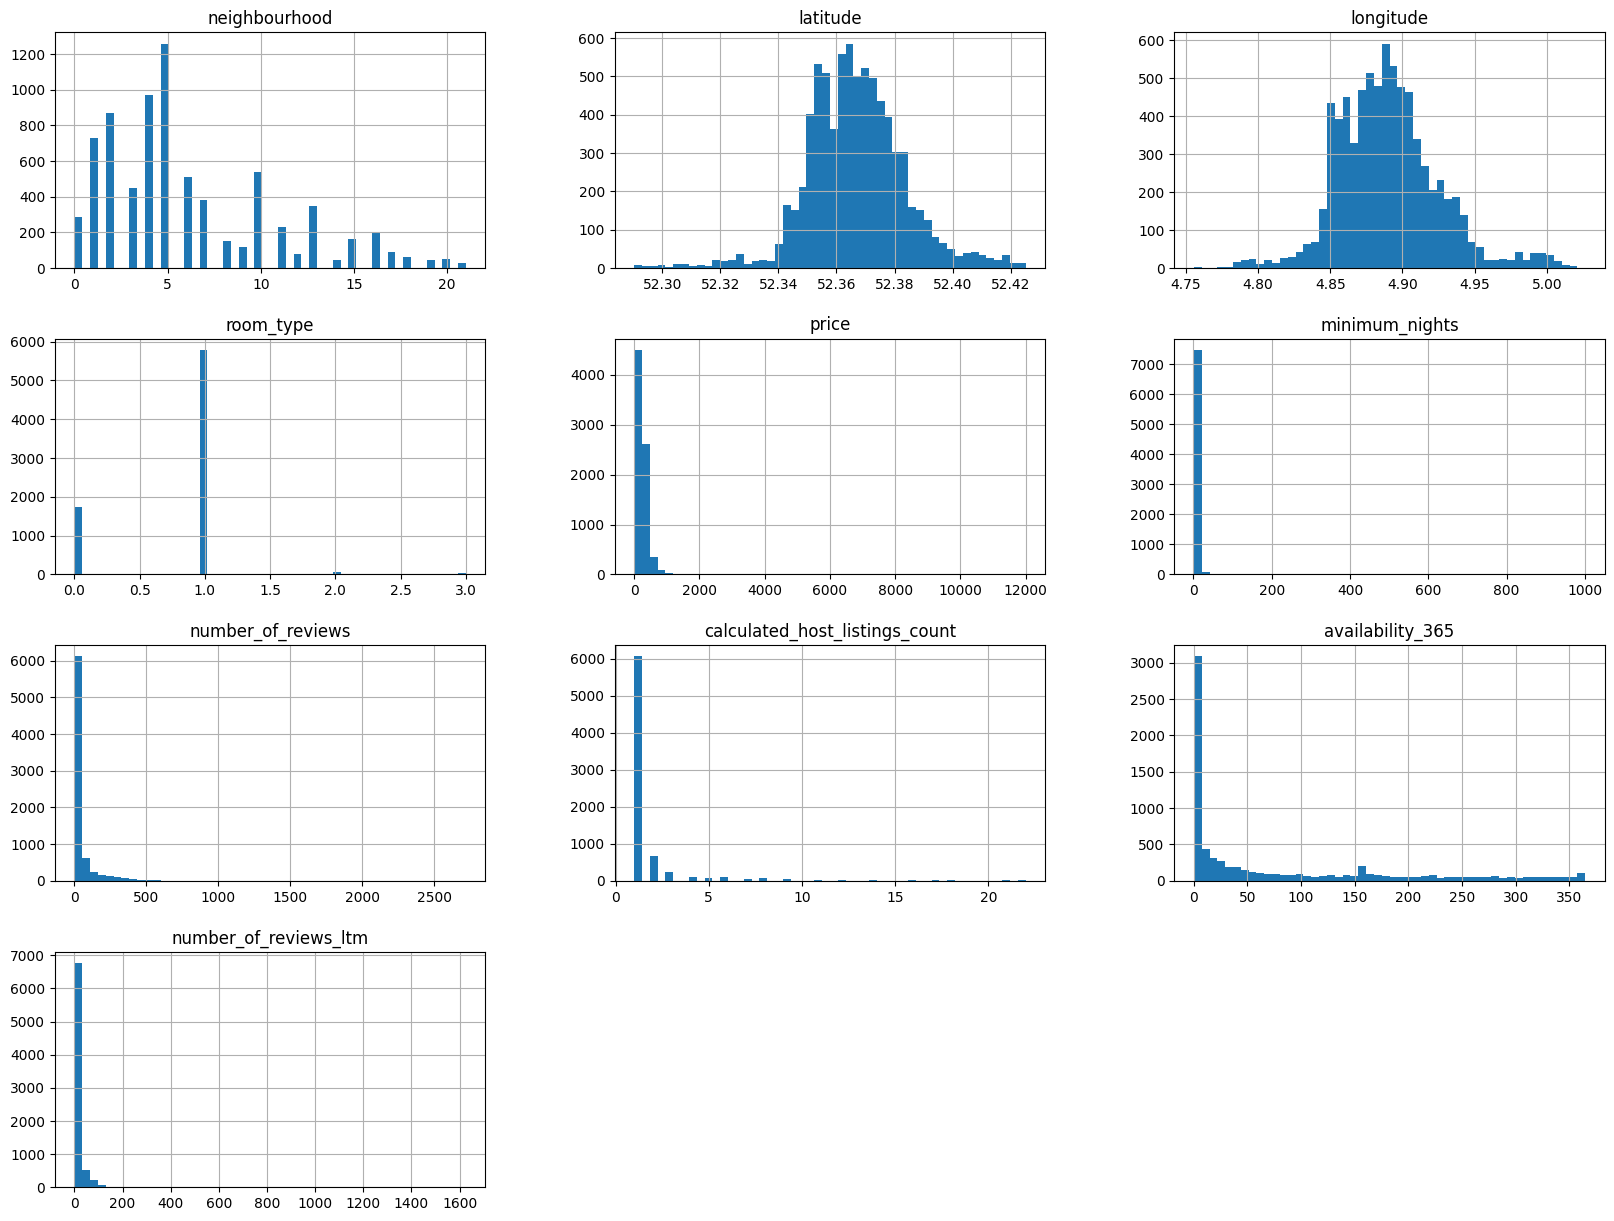

In [47]:
airBnbData.hist(bins=50, figsize=(20,15))
#from the graph we notice that the most popular neghbourhood is the 5 and the most popular room type is the 1
print(f"the most popular room type is {RoomType[1]} while the most popular neghbourhood is {neighbourhood[5]}")